# Project 2: Predicting NBA Career Longevity - A Machine Learning Approach to Career Durability

### Import Libraries

In [139]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 

In [141]:
df = pd.read_csv("datasets/nba-players.csv")

In [143]:
df

Unnamed: 0             name  gp   min  pts  fgm  fga    fg  3p_made  \
0              0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5   
1              1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7   
2              2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4   
3              3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1   
4              4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0   
...          ...              ...  ..   ...  ...  ...  ...   ...      ...   
1335        1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0   
1336        1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1   
1337        1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0   
1338        1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0   
1339        1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4   

      3pa  ...  fta    ft  oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
0     2.1  ...  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1     2.8  ...  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2     1.7  ...  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
3     0.5  ...  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0            1  
4     0.1  ...  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8            1  
...   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335  0.2  ...  1.5  79.2   0.4   0.8  1.2  2.5  0.6  0.2  0.8            0  
1336  0.7  ...  1.0  79.4   0.4   1.1  1.5  2.3  0.8  0.0  1.3            1  
1337  0.0  ...  1.6  64.3   1.5   2.3  3.8  0.3  0.3  0.4  0.9            0  
1338  0.2  ...  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339  1.3  ...  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9            1  

[1340 rows x 22 columns]

### Pre-Processing

In [146]:
df.dtypes # data types match as expected

Unnamed: 0       int64
name            object
gp               int64
min            float64
pts            float64
fgm            float64
fga            float64
fg             float64
3p_made        float64
3pa            float64
3p             float64
ftm            float64
fta            float64
ft             float64
oreb           float64
dreb           float64
reb            float64
ast            float64
stl            float64
blk            float64
tov            float64
target_5yrs      int64
dtype: object

In [148]:
df.isnull().sum() # No row contains null or missing values 

Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [150]:
duplicated = df.duplicated(subset=["name"]) 
duplicated.value_counts() # counts the number of duplicates in our dataframe of names that represent the true value

False    1294
True       46
Name: count, dtype: int64

In [152]:
df[df["name"] == "Glenn Robinson"]

Unnamed: 0            name  gp   min   pts  fgm   fga    fg  3p_made  \
1229        1229  Glenn Robinson  80  37.0  21.9  8.0  17.6  45.1      1.1   
1230        1230  Glenn Robinson  80  37.0  21.9  8.0  17.6  45.1      1.1   

      3pa  ...  fta    ft  oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
1229  3.4  ...  6.2  79.6   2.1   4.3  6.4  2.5  1.4  0.3  3.9            0  
1230  3.4  ...  6.2  79.6   2.1   4.3  6.4  2.5  1.4  0.3  3.9            1  

[2 rows x 22 columns]

In [154]:
duplicates_df = df[df["name"].duplicated() == True] # finds all entries where the name is the same
df = df[~df["name"].isin(duplicates_df["name"])] # filters the entire list against the duplicated names

In [156]:
df.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [170]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.drop(columns=["name"], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

### Visulizations

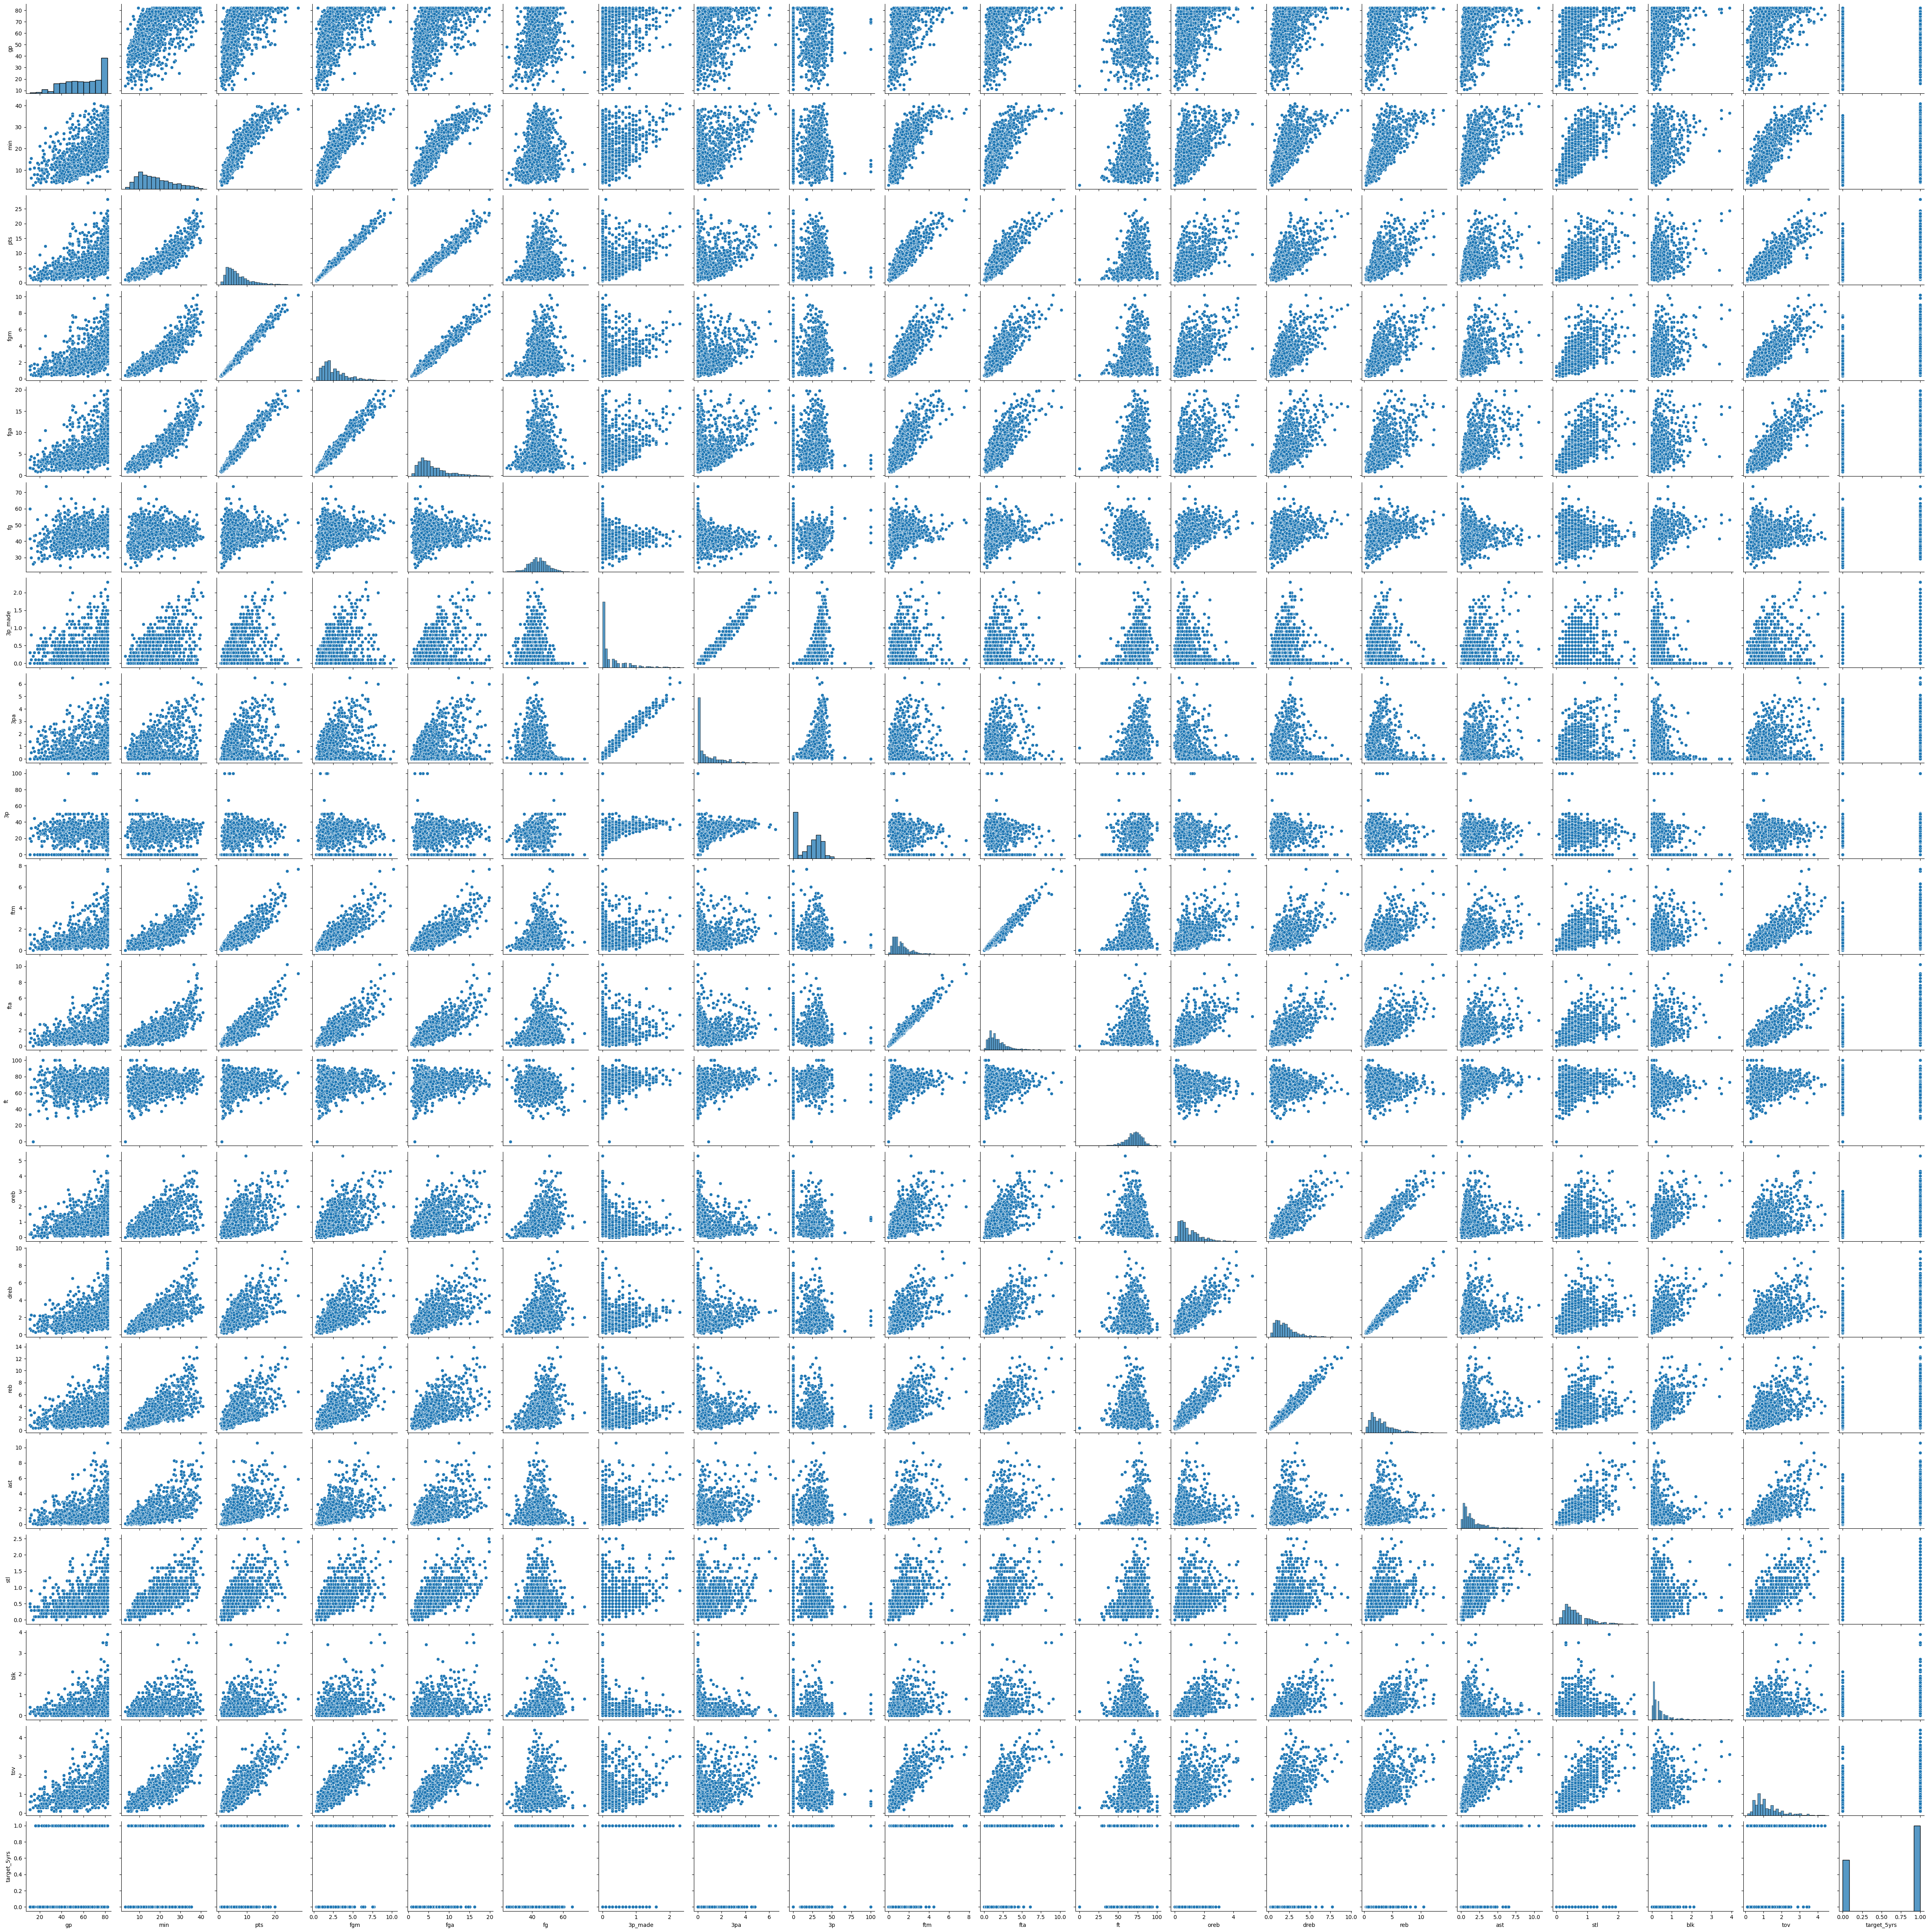

In [174]:
sns.pairplot(data=df)

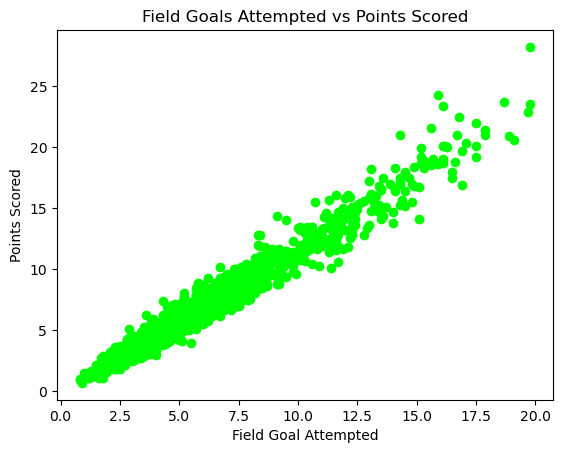

In [176]:
plt.scatter(df["fga"],df["pts"], c="lime")
plt.title("Field Goals Attempted vs Points Scored")
plt.xlabel("Field Goal Attempted")
plt.ylabel("Points Scored")
plt.show()

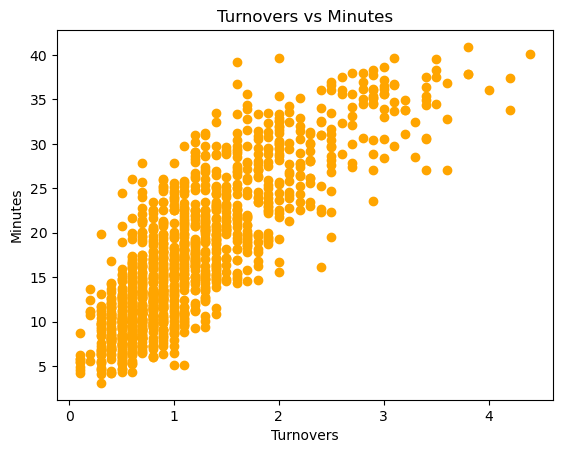

In [178]:
plt.scatter(df["tov"],df["min"], c="orange")
plt.title("Turnovers vs Minutes")
plt.xlabel("Turnovers")
plt.ylabel("Minutes")
plt.show()

## Classification Models

## Decision Trees

In [265]:
X = df.drop(columns = ["target_5yrs"])
y = df["target_5yrs"]


In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 ) #80% train, 20% test

In [269]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (1012, 19)
X_test (253, 19)
y_train (1012,)
y_test (253,)


In [271]:
from sklearn import tree

In [273]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [275]:
clf = clf.fit(X_train, y_train) #fit training data to the model

In [277]:
predicted = clf.predict(X_test)

In [283]:
predicted

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [285]:
clf.score(X_test, y_test) # Accuracy Score of 0.62 (low)

0.6521739130434783

In [287]:
fi = clf.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/_k/3ztly4kj4qn0w0v_vhr9l01m0000gn/T/ipykernel_87349/3904561555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
/var/folders/_k/3ztly4kj4qn0w0v_vhr9l01m0000gn/T/ipykernel_87349/3904561555.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


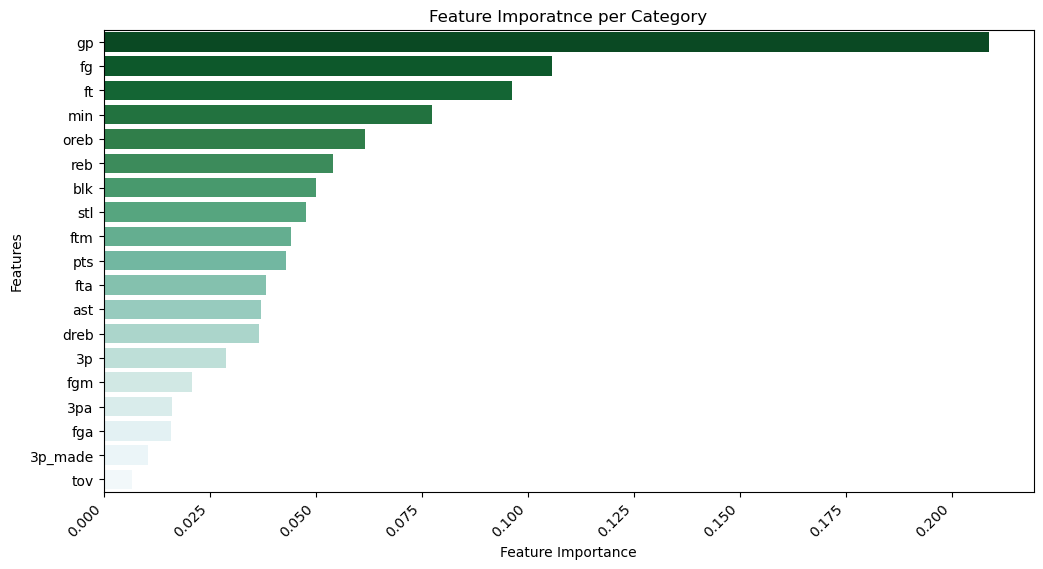

In [289]:
#create bar plot For Feature importance
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Imporatnce per Category")
plt.show()

In [291]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53        94
           1       0.72      0.73      0.72       159

    accuracy                           0.65       253
   macro avg       0.63      0.63      0.63       253
weighted avg       0.65      0.65      0.65       253



#### Increase the Robustness of the Model

In [294]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

In [296]:
X = df.drop(columns = ["target_5yrs", "gp", "fg"]) #dependent set
y = df['target_5yrs'] #independent set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 ) #split into training and test

In [298]:
clf2 = tree.DecisionTreeClassifier() #instantiate decision tree class
clf2 = clf2.fit(X_train, y_train) #fit data

In [300]:
cvs = cross_validate(clf2, X, y, cv = 10, return_estimator=True)

In [302]:
score = cvs['test_score'].mean()
score

0.6181102362204725

In [304]:
predicted = clf2.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42        84
           1       0.71      0.64      0.67       169

    accuracy                           0.58       253
   macro avg       0.55      0.55      0.55       253
weighted avg       0.60      0.58      0.59       253



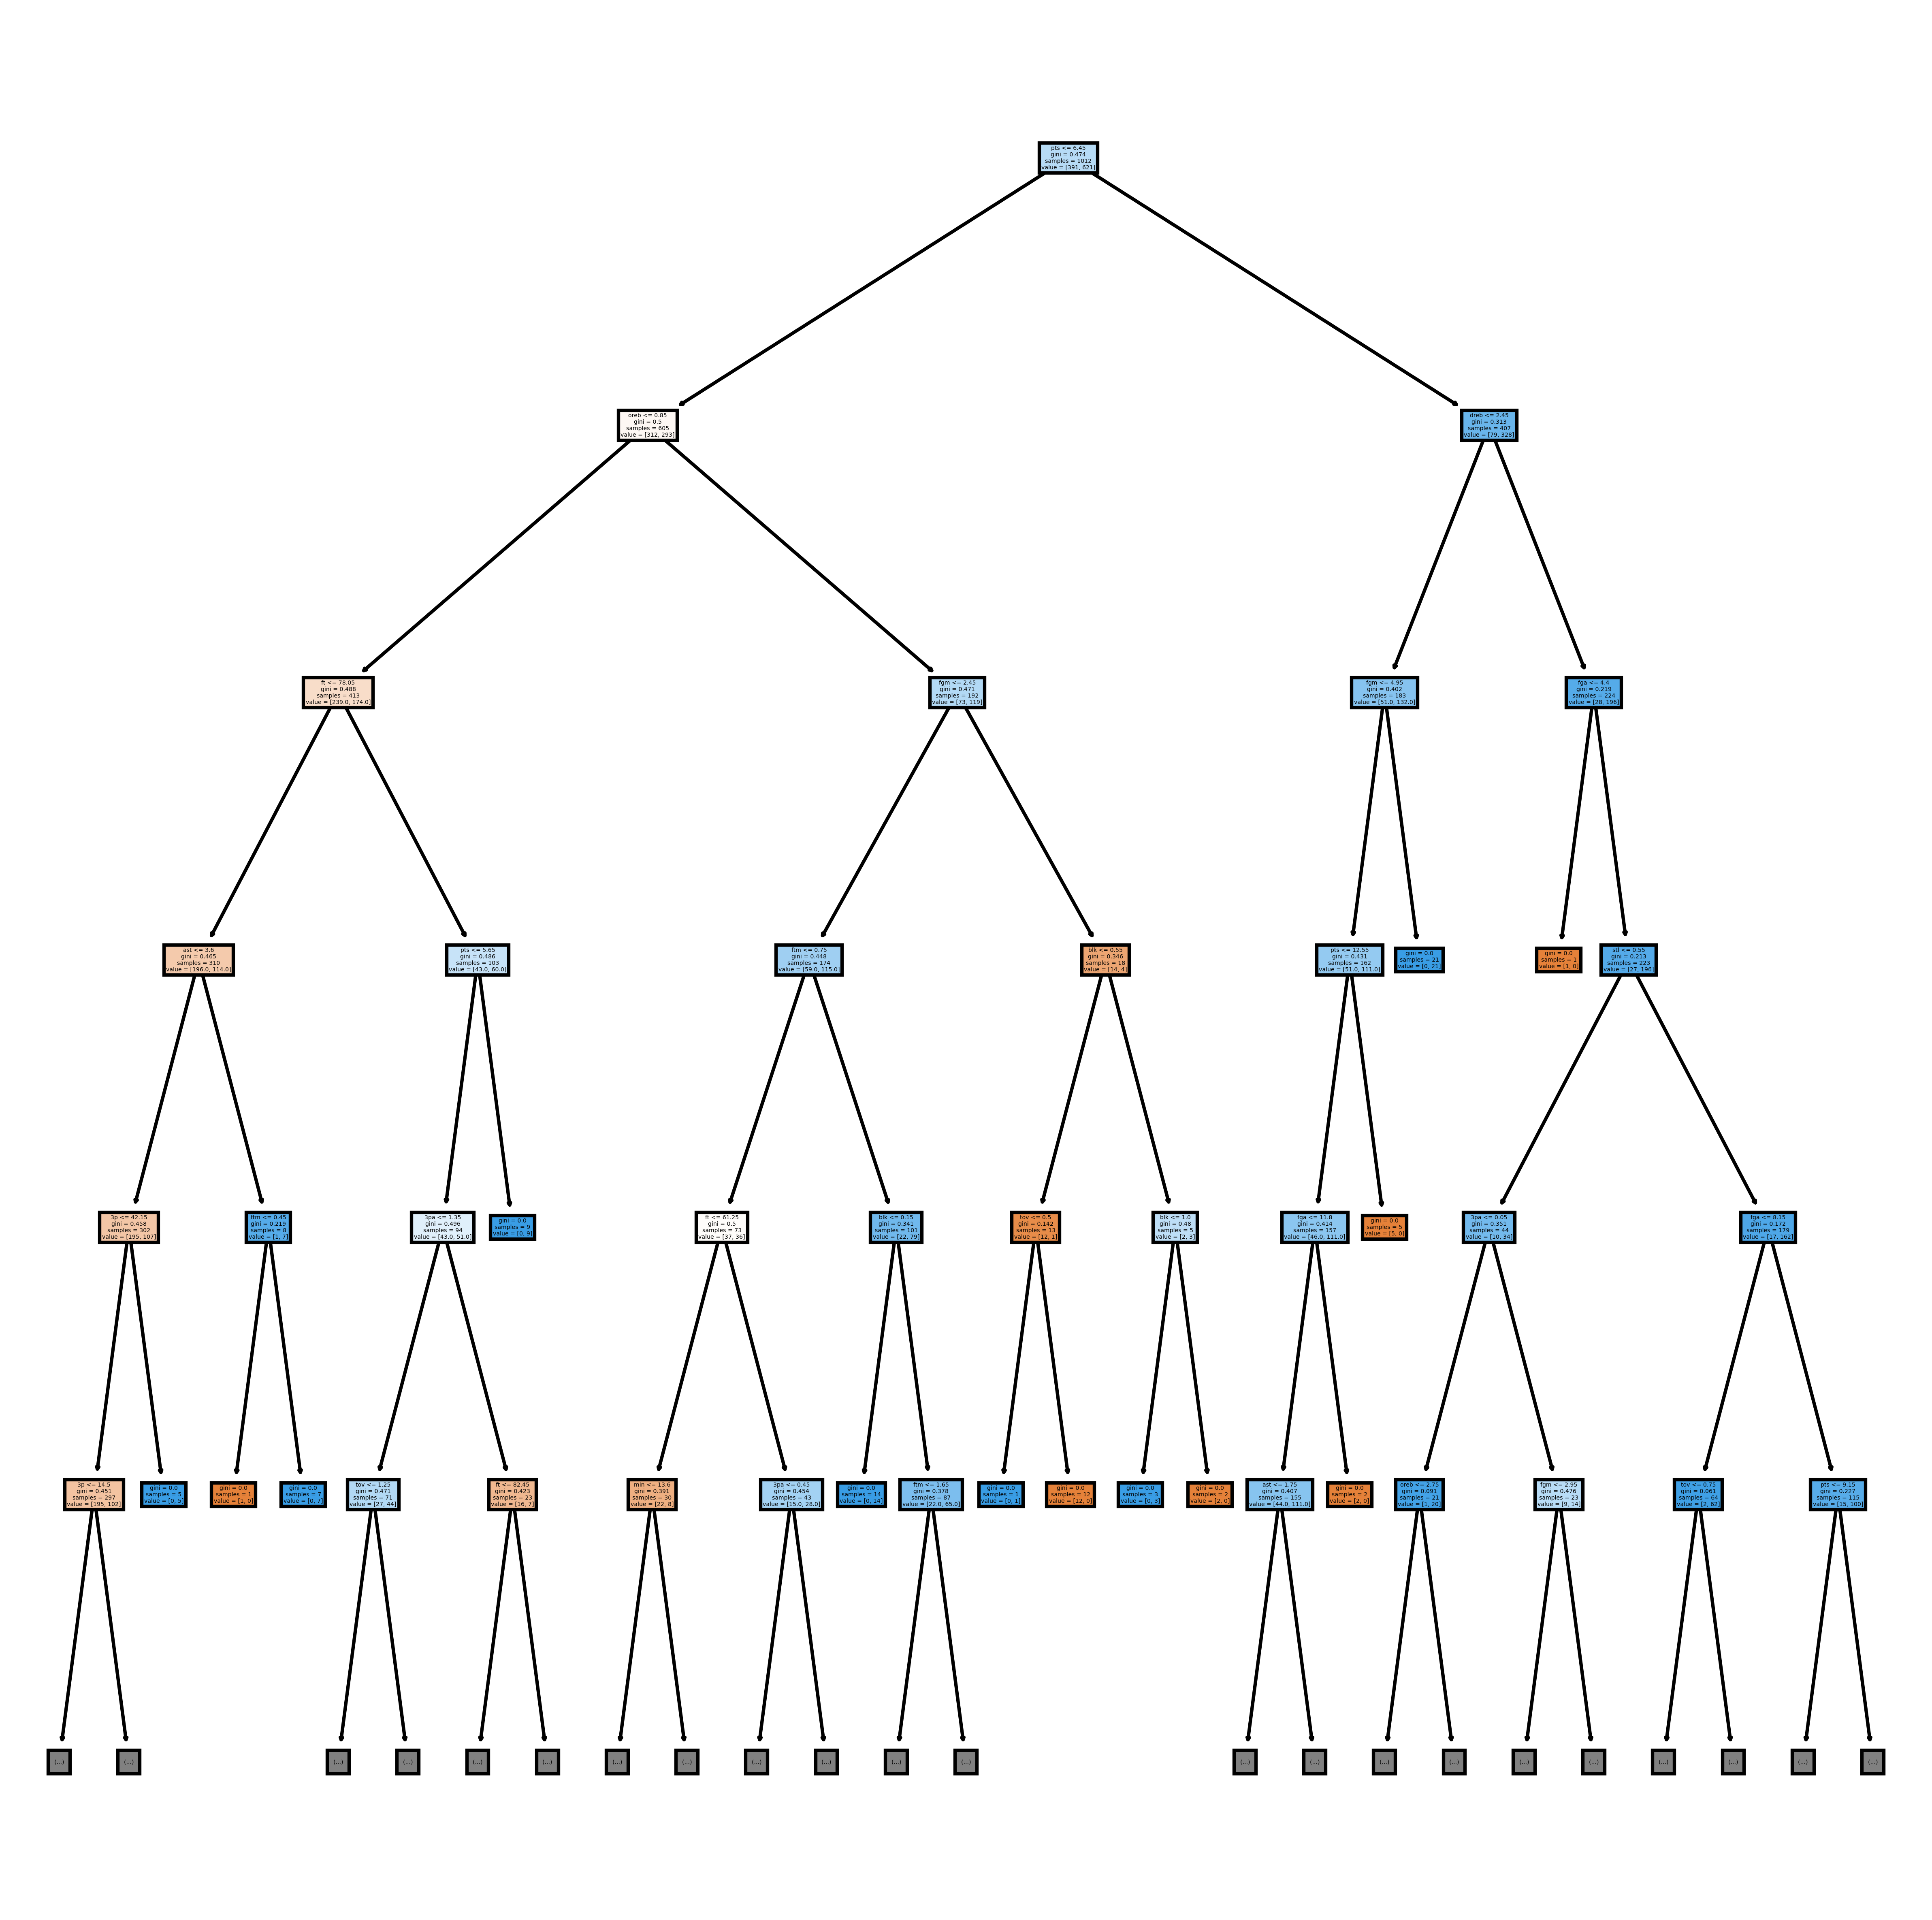

In [308]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=600)
tree.plot_tree(clf2, max_depth = 5, feature_names = X.columns, filled=True)
plt.show()

### SVM

In [315]:
df

gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ftm  fta    ft  oreb  \
0     36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1     35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2     74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3     58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4     48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   
...   ..   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   ...   
1333  79  16.1  5.3  1.8  4.1  44.6      0.0  0.1  28.6  1.6  2.5  66.5   1.5   
1336  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   0.4   
1337  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  1.0  1.6  64.3   1.5   
1338  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   0.2   
1339  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   0.2   

      dreb  reb  ast  stl  blk  tov  target_5yrs  
0      3.4  4.1  1.9  0.4  0.4  1.3            0  
1      2.0  2.4  3.7  1.1  0.5  1.6            0  
2      1.7  2.2  1.0  0.5  0.3  1.0            0  
3      0.9  1.9  0.8  0.6  0.1  1.0            1  
4      1.5  2.5  0.3  0.3  0.4  0.8            1  
...    ...  ...  ...  ...  ...  ...          ...  
1333   2.5  4.0  0.9  0.6  0.5  1.1            0  
1336   1.1  1.5  2.3  0.8  0.0  1.3            1  
1337   2.3  3.8  0.3  0.3  0.4  0.9            0  
1338   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339   0.7  0.9  1.4  0.7  0.1  0.9            1  

[1265 rows x 20 columns]

In [471]:
X = df.drop(columns = ["target_5yrs"])
y = df["target_5yrs"]


In [473]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

In [475]:
from sklearn.svm import SVC
model = SVC(C=5) # Support vector classifier

In [477]:
model.fit(X_train, y_train)

SVC(C=5)

In [479]:
model.score(X_test, y_test)

0.7470355731225297

In [481]:
cvs2 = cross_validate(model, X, y, cv = 10, return_estimator=True)

In [483]:
score = cvs['test_score'].mean()
score

0.6181102362204725

In [485]:
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62        91
           1       0.78      0.85      0.81       162

    accuracy                           0.75       253
   macro avg       0.73      0.71      0.71       253
weighted avg       0.74      0.75      0.74       253



In [487]:
df[df["target_5yrs"] == 1]

gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ftm  fta    ft  oreb  \
3     58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4     48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   
6     62  10.9  6.6  2.5  5.8  43.5      0.0  0.1  50.0  1.5  1.8  81.1   0.5   
7     48  10.3  5.7  2.3  5.4  41.5      0.4  1.5  30.0  0.7  0.8  87.5   0.8   
11    40   6.7  3.6  1.2  3.0  39.8      0.1  0.6  13.6  1.1  1.5  77.6   0.5   
...   ..   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   ...   
1331  82  18.3  5.2  2.1  4.6  45.6      0.5  1.3  39.1  0.5  0.8  57.4   0.3   
1332  50  16.3  5.4  2.2  5.0  43.8      0.1  0.4  31.6  0.9  1.1  79.6   0.3   
1336  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   0.4   
1338  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   0.2   
1339  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   0.2   

      dreb  reb  ast  stl  blk  tov  target_5yrs  
3      0.9  1.9  0.8  0.6  0.1  1.0            1  
4      1.5  2.5  0.3  0.3  0.4  0.8            1  
6      1.4  2.0  0.6  0.2  0.1  0.7            1  
7      0.9  1.7  0.2  0.2  0.1  0.7            1  
11     0.8  1.2  0.4  0.3  0.1  0.6            1  
...    ...  ...  ...  ...  ...  ...          ...  
1331   1.1  1.4  3.3  0.7  0.1  1.0            1  
1332   0.9  1.1  1.7  0.4  0.1  0.9            1  
1336   1.1  1.5  2.3  0.8  0.0  1.3            1  
1338   0.4  0.7  2.2  0.4  0.1  0.8            1  
1339   0.7  0.9  1.4  0.7  0.1  0.9            1  

[790 rows x 20 columns]

In [489]:
df[df["target_5yrs"] == 0]

gp   min   pts  fgm  fga    fg  3p_made  3pa    3p  ftm  fta    ft  \
0     36  27.4   7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   
1     35  26.9   7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   
2     74  15.3   5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   
5     75  11.4   3.7  1.5  3.5  42.3      0.3  1.1  32.5  0.4  0.5  73.2   
8     65   9.9   2.4  1.0  2.4  39.2      0.1  0.5  23.3  0.4  0.5  71.4   
...   ..   ...   ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   
1325  20  21.1   9.4  3.7  8.2  44.8      0.0  0.1   0.0  2.1  2.7  75.9   
1328  73  18.9  10.3  4.0  8.4  47.5      0.0  0.1  33.3  2.2  2.9  76.2   
1329  40  15.4   6.1  2.8  5.4  52.8      0.1  0.5  23.8  0.4  0.5  73.7   
1333  79  16.1   5.3  1.8  4.1  44.6      0.0  0.1  28.6  1.6  2.5  66.5   
1337  43  12.1   5.4  2.2  3.9  55.0      0.0  0.0   0.0  1.0  1.6  64.3   

      oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
0      0.7   3.4  4.1  1.9  0.4  0.4  1.3            0  
1      0.5   2.0  2.4  3.7  1.1  0.5  1.6            0  
2      0.5   1.7  2.2  1.0  0.5  0.3  1.0            0  
5      0.2   0.7  0.8  1.8  0.4  0.0  0.7            0  
8      0.2   0.6  0.8  2.3  0.3  0.0  1.1            0  
...    ...   ...  ...  ...  ...  ...  ...          ...  
1325   1.9   2.2  4.1  1.2  0.8  0.3  1.3            0  
1328   1.0   1.0  2.0  1.0  0.5  0.1  1.3            0  
1329   1.0   1.1  2.1  0.6  0.5  0.2  0.7            0  
1333   1.5   2.5  4.0  0.9  0.6  0.5  1.1            0  
1337   1.5   2.3  3.8  0.3  0.3  0.4  0.9            0  

[475 rows x 20 columns]